Day 4 Solution:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [3]:
df.dtypes

Company Name                                  object
company contact                               object
company email                                 object
company phone                                 object
Address                                       object
City                                          object
State                                         object
Postcode                                       int64
Industry                                      object
Industry descr                                object
Company Type                                  object
Current fulltime                             float64
Job created                                  float64
Job retain                                   float64
Effective Date                                object
Total Savings                                float64
Savings from beginning receiving benefits    float64
Borough                                       object
Latitude                                     f

1-Number of companies:

In [4]:
print(df['Company Name'].str.strip().str.lower().unique().shape[0])

439


2-Total Number of Jobs created in Queens:

In [5]:
print(int(df[df['Borough']=='Queens']['Job created'].sum()))

102


3-Number of Domains:

In [6]:
print(df['company email'].str.split('@').str[1].str.strip().str.lower().unique().shape[0])

357


4-NTA Stats:

In [7]:
df['Modified Company Name']=df['Company Name'].str.strip().str.lower()
df['Modified NTA Name']=df['NTA'].str.strip().str.lower()
df['Business Count per NTA']=df.groupby('Modified NTA Name')['Modified Company Name'].transform('nunique')
nta_5=df[df['Business Count per NTA']>=5] #This will also exclude data points where NTA is missing


In [8]:
#NTA Aggregate Level Function:
def f(x):
    d={}
    d['avg total savings']=x['Total Savings'].mean()
    d['total jobs created']=x['Job created'].sum()
    return pd.Series(d, index=['avg total savings','total jobs created'])

In [9]:
result_df=nta_5.groupby('Modified NTA Name').apply(f).reset_index()

In [10]:
result_df

,Modified NTA Name,avg total savings,total jobs created
0,battery park city-lower manhattan,469890.796667,0.0
1,bushwick south,26140.455000,10.0
2,carroll gardens-columbia street-red hook,24337.390000,0.0
3,college point,17159.372857,2.0
4,crown heights north,4036.298889,0.0
5,dumbo-vinegar hill-downtown brooklyn-boerum hill,59950.340000,0.0
6,east new york,48433.093333,15.0
7,east williamsburg,13990.626364,0.0
8,greenpoint,9753.649286,0.0
9,hunters point-sunnyside-west maspeth,23931.398933,0.0


5-Saving Results:

In [11]:
result_df.to_csv('Day4_Results.csv',index=False)

Day 5 Solution:

In [12]:
import matplotlib.pyplot as plt

Scatter Plot Standard Scale

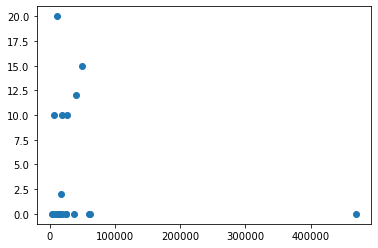

In [15]:
plt.scatter(result_df['avg total savings'],result_df['total jobs created'])

Scatter Plot Log Scale:

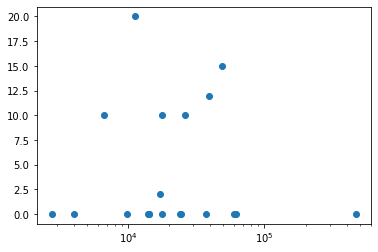

In [18]:
plt.scatter(result_df['avg total savings'],result_df['total jobs created'])
plt.xscale('log')

Histogram Log Scale:

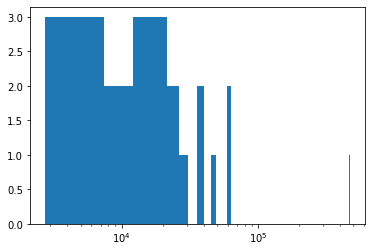

In [22]:
plt.hist(result_df['avg total savings'], bins=100)
plt.xscale('log')

Line Plot of Total Jobs:

In [33]:
import datetime as dt

day5_df=df[['Effective Date','Job created']]
day5_df['Effective Date']=pd.to_datetime(day5_df['Effective Date'])
day5_df['Month-Year'] = day5_df['Effective Date'].dt.to_period('M')


In [38]:
plot_df=day5_df.groupby('Month-Year')['Job created'].sum()

In [39]:
plot_df

Month-Year
1993-02    15.0
2004-03    10.0
2005-02    12.0
2005-03     0.0
2005-06     0.0
           ... 
2020-03     0.0
2020-04     0.0
2020-05     0.0
2020-06     0.0
2020-07     0.0
Freq: M, Name: Job created, Length: 140, dtype: float64

<AxesSubplot:xlabel='Month-Year'>

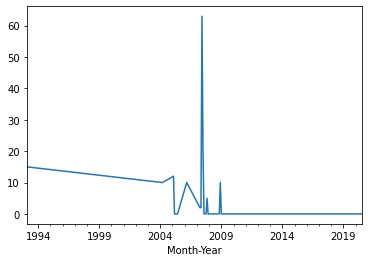

In [42]:
plot_df.plot()
